# Introduction

## Libraries

In [1]:
# for scientific computing with Python
import pandas as pd
import numpy as np
import os as os

# charting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sn

## Load Data

In [2]:
oecdDf = pd.read_csv('../DataAnalytics/Data/OECD_QualityOfLife.csv', sep=',')

## Clean Data

In [3]:
oecdDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        24 non-null     object 
 1   HofstederPowerDx               24 non-null     int64  
 2   HofstederIndividuality         24 non-null     int64  
 3   HofstederMasculinity           24 non-null     int64  
 4   HofstederUncertaintyAvoidance  24 non-null     int64  
 5   HofstederLongtermOrientation   24 non-null     int64  
 6   HofstederIndulgence            24 non-null     int64  
 7   Patents                        24 non-null     int64  
 8   PatentsPerCapita               24 non-null     int64  
 9   Diversity_Ethnic               24 non-null     float64
 10  Diversity_Linguistic           24 non-null     float64
 11  Diversity_Religious            24 non-null     float64
 12  ReligionMatters                22 non-null     float

In [4]:
oecdTrimmed = oecdDf.drop(oecdDf.iloc[:,26:35], axis=1, inplace=False)
#oecdTrimmed.info()

In [5]:
oecdTrimmed.drop(oecdTrimmed.columns[[14, 26]], axis=1, inplace=True)
#oecdTrimmed.info()

## Charting OECD Analysis

In [6]:
oecdCorr = oecdTrimmed.corr()
#oecdCorr

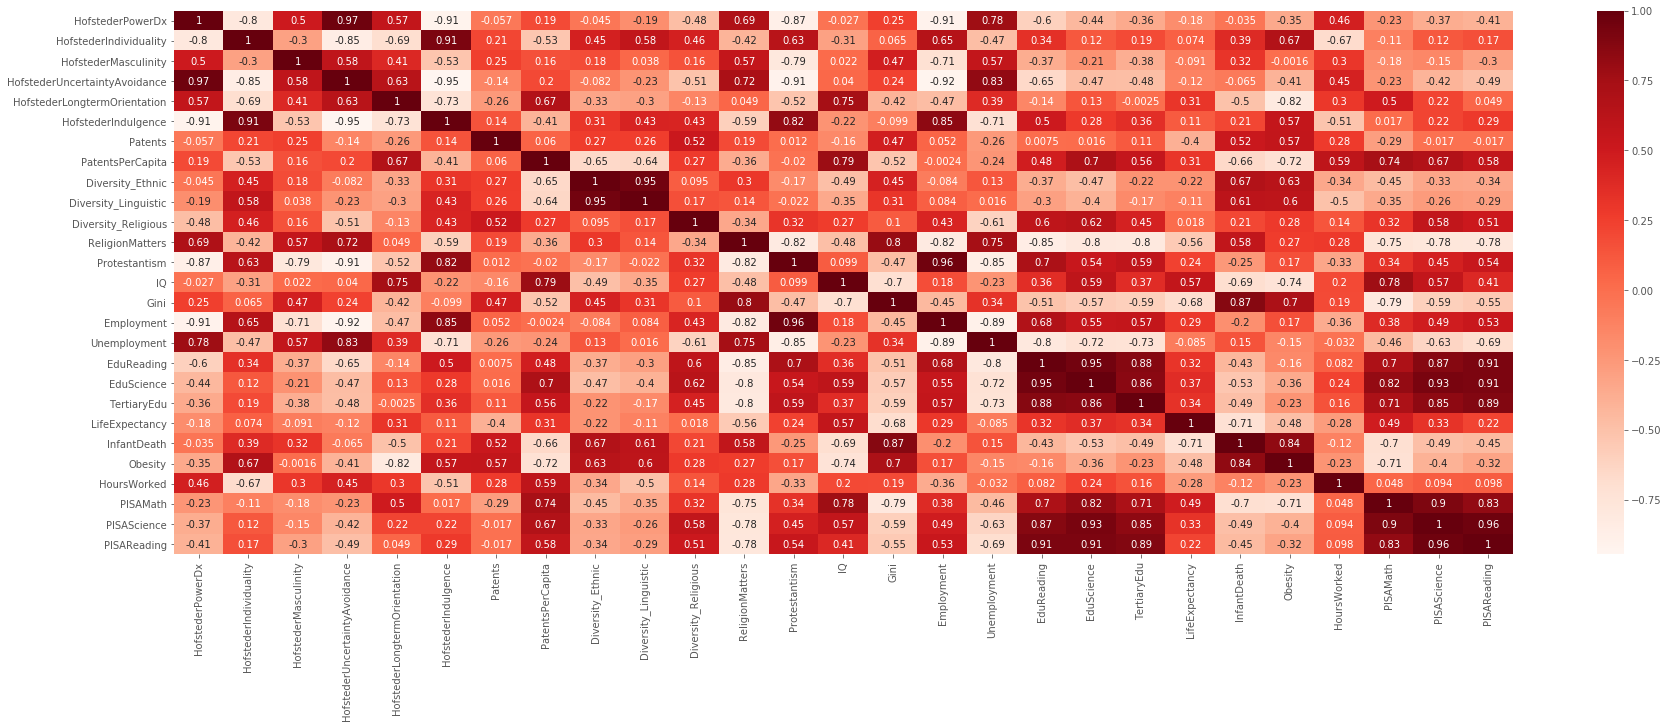

In [7]:

plt.figure(figsize=(30,10))
sn.heatmap(oecdCorr.corr(), annot=True, cmap="Reds")
plt.show()

### Filter for Significant Correlations

In [8]:
filterDf = oecdCorr[((oecdCorr >= .5) | (oecdCorr <= -.5)) & (oecdCorr !=1.000)]
#filterDf


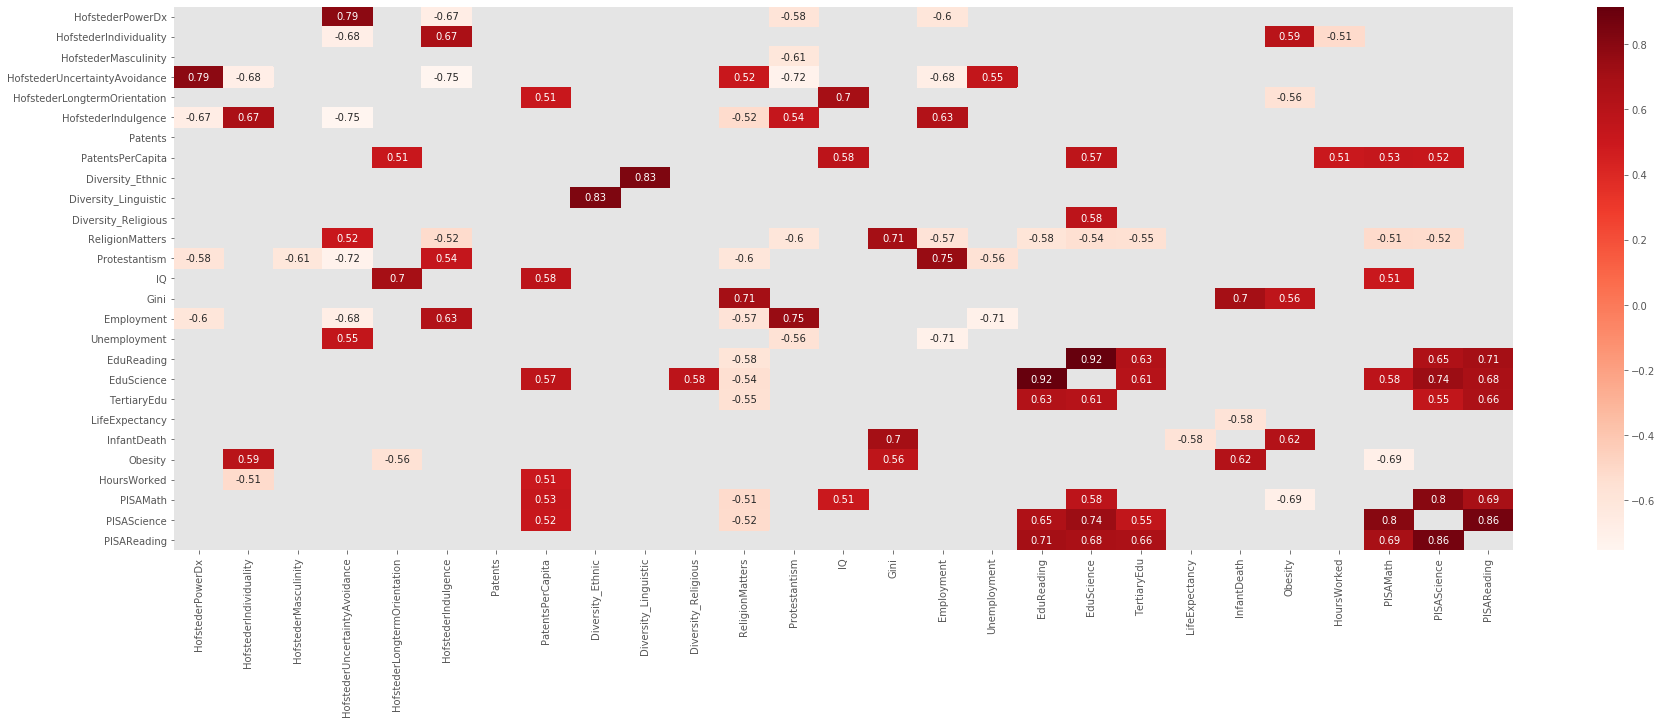

In [9]:
plt.figure(figsize=(30,10))
sn.heatmap(filterDf, annot=True, cmap="Reds")
plt.show()

### Flatten the Results

In [10]:
flatteneddDf = filterDf.unstack().sort_values().drop_duplicates()
#flatteneddDf

In [11]:
flatteneddDf.head(22)

HofstederIndulgence            HofstederUncertaintyAvoidance   -0.752436
HofstederUncertaintyAvoidance  Protestantism                   -0.722509
Unemployment                   Employment                      -0.711838
Obesity                        PISAMath                        -0.689041
HofstederUncertaintyAvoidance  HofstederIndividuality          -0.682719
Employment                     HofstederUncertaintyAvoidance   -0.679724
HofstederPowerDx               HofstederIndulgence             -0.673267
HofstederMasculinity           Protestantism                   -0.606479
Protestantism                  ReligionMatters                 -0.601954
HofstederPowerDx               Employment                      -0.598470
ReligionMatters                EduReading                      -0.583921
Protestantism                  HofstederPowerDx                -0.580308
LifeExpectancy                 InfantDeath                     -0.575760
ReligionMatters                Employment          

In [12]:
flatteneddDf.tail(36)

HoursWorked                    PatentsPerCapita                 0.507169
PISAMath                       IQ                               0.511593
HofstederLongtermOrientation   PatentsPerCapita                 0.512250
HofstederUncertaintyAvoidance  ReligionMatters                  0.515928
PatentsPerCapita               PISAScience                      0.519392
                               PISAMath                         0.526101
HofstederIndulgence            Protestantism                    0.536424
Unemployment                   HofstederUncertaintyAvoidance    0.547742
PISAScience                    TertiaryEdu                      0.552557
Obesity                        Gini                             0.564622
PatentsPerCapita               EduScience                       0.571725
IQ                             PatentsPerCapita                 0.577580
Diversity_Religious            EduScience                       0.577823
PISAMath                       EduScience          

In [22]:


def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

newList = corrFilter(oecdTrimmed, .5)

In [30]:
newList

HofstederIndulgence            HofstederUncertaintyAvoidance   -0.752436
HofstederUncertaintyAvoidance  Protestantism                   -0.722509
Unemployment                   Employment                      -0.711838
Obesity                        PISAMath                        -0.689041
HofstederUncertaintyAvoidance  HofstederIndividuality          -0.682719
Employment                     HofstederUncertaintyAvoidance   -0.679724
HofstederPowerDx               HofstederIndulgence             -0.673267
HofstederMasculinity           Protestantism                   -0.606479
Protestantism                  ReligionMatters                 -0.601954
HofstederPowerDx               Employment                      -0.598470
ReligionMatters                EduReading                      -0.583921
Protestantism                  HofstederPowerDx                -0.580308
LifeExpectancy                 InfantDeath                     -0.575760
ReligionMatters                Employment          

In [28]:
type(newList)

pandas.core.series.Series

In [38]:
newList.describe()

count    57.000000
mean      0.162020
std       0.620896
min      -0.752436
25%      -0.560621
50%       0.536424
75%       0.662233
max       0.915638
dtype: float64

In [42]:
newList.index

MultiIndex([(          'HofstederIndulgence', 'HofstederUncertaintyAvoidance'),
            ('HofstederUncertaintyAvoidance',                 'Protestantism'),
            (                 'Unemployment',                    'Employment'),
            (                      'Obesity',                      'PISAMath'),
            ('HofstederUncertaintyAvoidance',        'HofstederIndividuality'),
            (                   'Employment', 'HofstederUncertaintyAvoidance'),
            (             'HofstederPowerDx',           'HofstederIndulgence'),
            (         'HofstederMasculinity',                 'Protestantism'),
            (                'Protestantism',               'ReligionMatters'),
            (             'HofstederPowerDx',                    'Employment'),
            (              'ReligionMatters',                    'EduReading'),
            (                'Protestantism',              'HofstederPowerDx'),
            (               'LifeExpecta

In [54]:
newList['Gini',].index
newList['Gini',]

ReligionMatters    0.706751
dtype: float64

In [55]:
newList[:,'Gini']

Obesity        0.564622
InfantDeath    0.702415
dtype: float64